In [99]:
#installing and importing all the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import inflect
import re
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from PIL import Image

In [ ]:
# inflect.py - Correctly generate plurals, singular nouns, ordinals, indefinite articles; convert numbers to words.
# re-This module provides regular expression matching operations similar to those found in Perl.Both patterns and strings to be searched can be Unicode strings (str) as well as 8-bit strings (bytes).
# PIL-The Python Imaging Library adds image processing capabilities to your Python interpreter.This library provides extensive file format support, an efficient internal representation, and fairly powerful image processing capabilities.

In [100]:
def to_lowercase(words):
    """Convert all characters to lowercase from list to tokenized words"""
    new_words=[]
    for word in words:
        new_word=word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuations from list"""
    new_words=[]
    for word in words:
        new_word=re.sub(r'[^\w\s]','',word)#sub here is the substitute and this will remove punctuations to spaces
        if new_word !='':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all integer occurences in list of tokenized words with textual representation"""
    p=inflect.engine()
    new_words=[]
    for word in words:
        if word.isdigit():
            new_word=p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words,extra):
    """Remove stop words from list of tokenized words"""
    sw=stopwords.words('english')
    sw.extend(extra)
    new_words=[]
    for word in words:
        if word not in sw:
            new_words.append(word)
    return new_words
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer=LancasterStemmer()
    stems=[]
    for word in words:
        stem=stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer=WordNetLemmatizer()
    lemmas=[]
    for word in words:
        lemma=lemmatizer.lemmatize(word,pos='v')#position of verbs
        lemmas.append(lemma)
    return lemmas
def normalize(words,additionalStopWords=[]):
    print('nomalizing data..')
    words=to_lowercase(words)
    print('lowecase done..')
    words=remove_punctuation(words)
    print('punctuations removal done..')
    words=replace_numbers(words)
    print('number replacement done..')
    words=remove_stopwords(words,additionalStopWords)
    print('stopwords removal done..')
    words=lemmatize_verbs(words)
    print('verb lemmatizing done..')
    return(words)


In [ ]:
#Importing all Harry Potter Books 

In [101]:
HP1=open("UserPath1.txt",encoding = "utf-8").read() #Book1 to book 7 import
HP2=open("UserPath2.txt",encoding = "utf-8").read()
HP3=open("UserPath3.txt",encoding = "utf-8").read()
HP4=open("UserPath4.txt",encoding = "utf-8").read()
HP5=open("UserPath5.txt",encoding = "utf-8").read()
HP6=open("UserPath6.txt",encoding = "utf-8").read()
HP7=open("UserPath7.txt",encoding = "utf-8").read()
HP_mask=np.array(Image.open("Userpath/harry-potter-logo.png")) 
#Using a mask you can generate wordclouds in arbitrary shapes.Here I have used HP Logo 

In [102]:
HP=HP1+HP2+HP3+HP4+HP5+HP6+HP7 #Combining all the books

In [104]:
extraStopWords = ['jk','rowling','say','could'] #Adding more stopwords which aren't there in the nltk.corpus
HPclean=normalize(HP.split(' '),extraStopWords) #Using split as the normalize takes array as an argument
print(HPclean[100:200])

nomalizing data..
lowecase done..
punctuations removal done..
number replacement done..
stopwords removal done..
verb lemmatizing done..
['potter', 'philosophers', 'stone', '\n\n\n\nmet', 'several', 'years', 'fact', 'mrs', 'dursley', 'pretend', '\nshe', 'didnt', 'sister', 'sister', '\ngoodfornothing', 'husband', 'undursleyish', '\nwas', 'possible', 'dursleys', 'shudder', 'think', '\nwhat', 'neighbor', 'would', 'potter', 'arrive', '\nthe', 'street', 'dursleys', 'know', 'potter', '\nsmall', 'son', 'never', 'even', 'see', '\n\nthis', 'boy', 'another', 'good', 'reason', 'keep', '\npotters', 'away', 'didnt', 'want', 'dudley', 'mix', '\nchild', 'like', '\n\nwhen', 'mr', 'mrs', 'dursley', 'wake', 'dull', 'gray', '\ntuesday', 'story', 'start', 'nothing', '\ncloudy', 'sky', 'outside', 'suggest', 'strange', '\nmysterious', 'things', 'would', 'soon', 'happen', '\nthe', 'country', 'mr', 'dursley', 'hum', 'pick', '\nhis', 'bore', 'tie', 'work', 'mrs', 'dursley', '\ngossiped', 'away', 'happily', 'wr

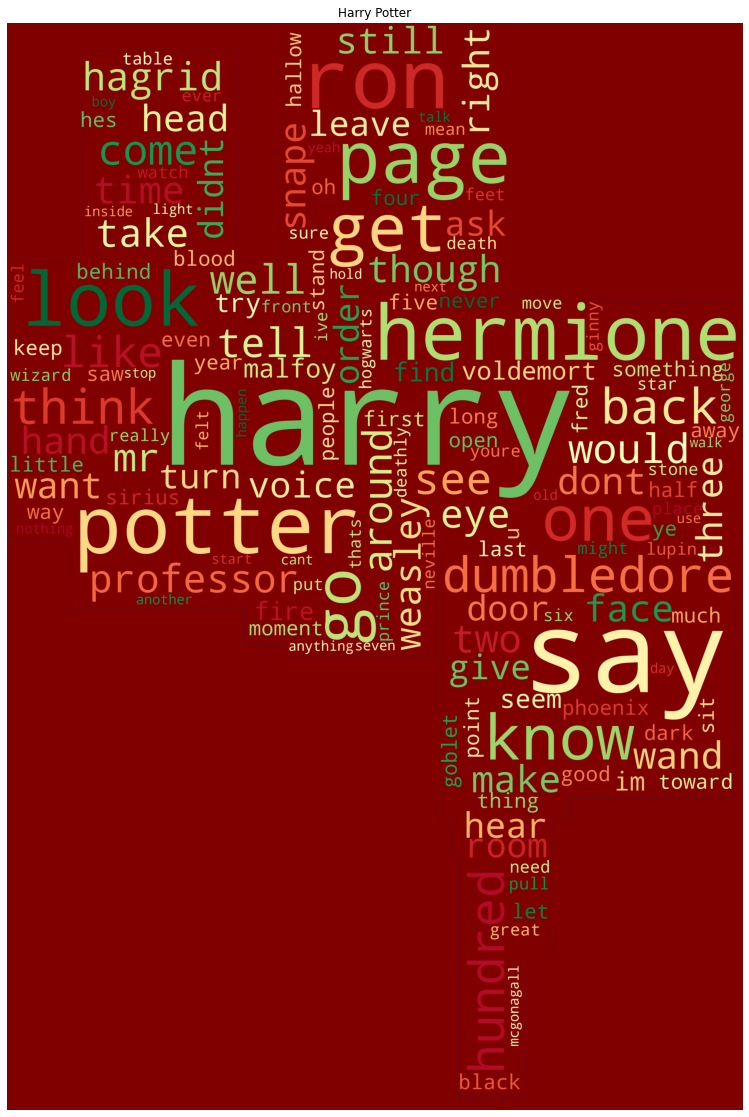

In [109]:
def generate_better_wordcloud(data, title, mask=None):
    cloud = WordCloud(scale=3,
                      max_words=150,
                      colormap='RdYlGn',
                      mask=mask,
                      background_color='maroon',
                      stopwords=stop_words,
                      collocations=False,
                      contour_color='#5d0f24',
                      contour_width=1).generate(data)
    plt.figure(figsize=(20,20))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()
    
# Call the function with HPClean(string format,hence ' '.join) title "Harry Potter" and our mask as argument to create word cloud     
generate_better_wordcloud(' '.join(HPclean), 'Harry Potter', mask=HP_mask)